**Install Packages**

In [991]:
!git clone https://github.com/fizyr/keras-retinanet

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [992]:
# %cd keras-retinanet
# !pip install .
# !python setup.py build_ext --inplace

/home/autospider/Desktop/keras-retinanet
Defaulting to user installation because normal site-packages is not writeable
Processing /home/autospider/Desktop/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=171095 sha256=f7deaf953a107d0bd84ba4a4e02b72fa76b7d0cf3bf09259c8e6e59c4aa3645b
  Stored in directory: /home/autospider/.cache/pip/wheels/05/66/ae/094edcda2f8cf2b2adefb10c75735c5df345b03dcb1373914f
Successfully built keras-retinanet
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/bin/bash: python: command not found


In [993]:
!pip install PyPDF2

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#https://buildmedia.readthedocs.org/media/pdf/camelot-py/latest/camelot-py.pdf
!apt install python-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 35 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 

In [5]:
!pip install camelot-py[cv]

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 5.6MB 7.1MB/s 
     |████████████████████████████████| 13.7MB 236kB/s 


In [6]:
!pip install pdf2image
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 0s (2,062 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 145529 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


**Get Weight and Labels**

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Import the necessary packages**

In [1]:
from keras_retinanet.utils.image import preprocess_image
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.image import resize_image
from keras_retinanet import models

from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PyPDF2 import PdfFileWriter, PdfFileReader

import numpy as np
import cv2
import camelot
import copy

**Load Label and Weight**

In [2]:
# load the class label mappings
#model for headers
#labels = '/content/gdrive/My Drive/Colab Notebooks/retinanet_classes_RN3.csv'

#model for table
labels = '/home/autospider/Desktop/logos1/retinanet_classes.csv'

LABELS = open(labels).read().strip().split("\n")
print(LABELS)
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}
print(LABELS)

['table2,0', 'table18,1', 'table3,2', 'table8,3', 'table1,4', 'table10,5', 'table,6', 'table11,7', 'table12,8', 'table19,9', 'table5,10', 'table15,11', 'table9,12', 'table13,13', 'table16,14', 'table20,15', 'table14,16', 'table17,17', 'table6,18', 'table4,19', 'table7,20']
{0: 'table2', 1: 'table18', 2: 'table3', 3: 'table8', 4: 'table1', 5: 'table10', 6: 'table', 7: 'table11', 8: 'table12', 9: 'table19', 10: 'table5', 11: 'table15', 12: 'table9', 13: 'table13', 14: 'table16', 15: 'table20', 16: 'table14', 17: 'table17', 18: 'table6', 19: 'table4', 20: 'table7'}


In [3]:
# load the weight from disk

#model for headers
#model_path = '/content/gdrive/My Drive/Colab Notebooks/output_RN3.h5'

#model for table
model_path = '/home/autospider/Desktop/deployment_new/model/output.h5'

model = models.load_model(model_path, backbone_name='resnet50')

**Functions**

In [4]:
def norm_pdf_page(pdf_file, pg):
    pdf_doc = PdfFileReader(open(pdf_file, "rb"),strict=False)
    pdf_page = pdf_doc.getPage(pg-1)
    pdf_page.cropBox.upperLeft = (0, list(pdf_page.mediaBox)[-1])
    pdf_page.cropBox.lowerRight = (list(pdf_page.mediaBox)[-2], 0)
    return pdf_page

def pdf_page2img(pdf_file, pg, save_image=True):
    img_page = convert_from_path(pdf_file, first_page=pg, last_page=pg)[0]
    if save_image:
        img=pdf_file[:-4]+"-"+str(pg)+".jpg"
        img_page.save(img)
    return np.array(img_page), img

def img_dim(img, bbox):
    H_img,W_img,_=img.shape
    x1_img, y1_img, x2_img, y2_img=bbox
    w_table, h_table=x2_img-x1_img, y2_img-y1_img
    return [[x1_img, y1_img, x2_img, y2_img], [w_table, h_table], [H_img,W_img]]

def norm_bbox(img, bbox, x_corr=0.05, y_corr=0.05):
    [[x1_img, y1_img, x2_img, y2_img], [w_table, h_table], [H_img,W_img]]=img_dim(img, bbox)
    x1_img_norm,y1_img_norm,x2_img_norm,y2_img_norm=x1_img/W_img, y1_img/H_img, x2_img/W_img, y2_img/H_img
    w_img_norm, h_img_norm=w_table/W_img, h_table/H_img
    w_corr=w_img_norm*x_corr
    h_corr=h_img_norm*x_corr

    return [x1_img_norm-w_corr,y1_img_norm-h_corr/2,x2_img_norm+w_corr,y2_img_norm+2*h_corr]

def bboxes_pdf(img, pdf_page, bbox, save_cropped=False):
    W_pdf=float(pdf_page.cropBox.getLowerRight()[0])
    H_pdf=float(pdf_page.cropBox.getUpperLeft()[1])
    print(bbox)

    [x1_img_norm,y1_img_norm,x2_img_norm,y2_img_norm]=norm_bbox(img, bbox)
    x1, y1 = x1_img_norm*W_pdf, (1-y1_img_norm)*H_pdf
    x2, y2 = x2_img_norm*W_pdf, (1-y2_img_norm)*H_pdf
    
    if save_cropped:
        page=copy.copy(pdf_page)
        page.cropBox.upperLeft = (x1, y1)
        page.cropBox.lowerRight = (x2, y2)
        output = PdfFileWriter()
        output.addPage(page)

        with open(pdf_file[:-4]+"-"+str(pg)+".pdf", "wb") as out_f:
            output.write(out_f)

    return [x1, y1, x2, y2]
    
# def detect_table(imgfname):
#     image_path = imgfname
#     image = read_image_bgr(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     output = image.copy()
#     output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    
#     image = preprocess_image(image)
#     (image, scale) = resize_image(image)
#     image = np.expand_dims(image, axis=0)

#     # detect objects in the input image and correct for the image scale

#     (boxes, scores, labels) = model.predict_on_batch(image)
#     boxes /= scale

#     confidence = 0.2
#     label_out = []

#     # loop over the detections

#     for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

#         # filter out weak detections

#         if score < confidence:
#             continue

#         # convert the bounding box coordinates from floats to integers
#         box = box.astype('int')

#         # build the label and draw the label + bounding box on the output image
#         labeli = label

#         if LABELS[labeli] not in label_out:
#           label_out.append(LABELS[labeli])
#           print(box)

#           return (box[0], box[1], box[2], box[3])
    
def detect_table(imgfname):
    x=[]
    image_path = imgfname
    #image = cv2.imread(image_path)
    image = read_image_bgr(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    output = image.copy()
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    #print(output.shape) # row (height) x column (width) x color (3)

    image = preprocess_image(image)
    (image, scale) = resize_image(image)
    image = np.expand_dims(image, axis=0)

    # detect objects in the input image and correct for the image scale
    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    confidence =  0.8
    #import cv2_imshow
    #import matplotlib.pyplot as plt
    label_out = []
    result = ""

    # loop over the detections
    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
        # filter out weak detections
        #print((box, score, label))
        if score < confidence:
            continue

        # convert the bounding box coordinates from floats to integers
        box = box.astype("int")
        print(box)
        # build the label and draw the label + bounding box on the output
        # image
        labeli = label
        label = "{}: {:.2f}".format(LABELS[label], score)
        print(label)

        if LABELS[labeli] not in label_out:
            label_out.append(LABELS[labeli])
        x.append((box[0], box[1], box[2], box[3]))
    return x

In [5]:
def detectObject(imName,page):
    pdf_file = imName
    pg = page
    img, imgfname = pdf_page2img(pdf_file, pg)
    image = read_image_bgr(imgfname)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    output = image.copy()
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    image = preprocess_image(image)
    (image, scale) = resize_image(image)
    image = np.expand_dims(image, axis=0)

    # detect objects in the input image and correct for the image scale
    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    confidence =  0.8
    #import cv2_imshow
    #import matplotlib.pyplot as plt
    label_out = []
    result = ""

    # loop over the detections
    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
        # filter out weak detections
        #print((box, score, label))
        if score < confidence:
            continue

        # convert the bounding box coordinates from floats to integers
        box = box.astype("int")
        #print(box)
        # build the label and draw the label + bounding box on the output
        # image
        labeli = label
        label = "{}: {:.2f}".format(LABELS[label], score)
        #print(label)

        if LABELS[labeli] not in label_out:
            label_out.append(LABELS[labeli])
        cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 12)
        t = time.localtime()
        timestamp = time.strftime('%b-%d-%Y_%H:%M:%S', t)
        cv2.imwrite('/home/autospider/Desktop/images/'+(str(label)+'-'+str(timestamp)+'.jpg'),output[box[1]:box[3],box[0]:box[2]])
        cv2.putText(output, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 4.5, (255, 1, 1), 12)

    img_r = cv2.imencode('.jpg', output)[1].tobytes()
    #cv2.imwrite('img_r.jpg',output)
    return img_r,imgfname,img


In [6]:
file = '/home/autospider/Desktop/PDF_Table_Extraction/SEC_Documents/Philip Morris International_AR 18.pdf'

In [7]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [8]:
with open(file, "rb") as pdf_file:
    pdf_reader = PdfFileReader(pdf_file,strict=False)
    b=pdf_reader.numPages

In [9]:
v=[]
for i in range(b):
    print(i)
    file1=i+1
    img_r,imgfname,img = detectObject(file,file1)
    pdf_page=norm_pdf_page(file, file1)
    z = detect_table(imgfname)
    interesting_areas=[]
    for x in z:
        [x1, y1, x2, y2] = bboxes_pdf(img, pdf_page, x)
        bbox_camelot = [",".join([str(x1), str(y1), str(x2), str(y2)])][0]
        print(bbox_camelot)
        interesting_areas.append(bbox_camelot)
    print(interesting_areas)
    output_camelot = camelot.read_pdf(filepath=file, pages=str(file1),table_areas=interesting_areas, flavor='stream',strip_text='\n\t')
    output_camelot=[x.df for x in output_camelot]
    if len(output_camelot)>=1:
        v.append(output_camelot)
    else:
        print('*****Passing*****')

0
[]
*****Passing*****
1
[]
*****Passing*****
2
[]
*****Passing*****
3
[]
*****Passing*****
4


KeyboardInterrupt: 

In [132]:
if 'ir(d) ' in 'ir(d) hjsdj jjsd ':
    print(True)

True


In [110]:
'(amazing){e<=1}'

'(amazing){e<=1}'

In [112]:
str(String)+"{e<=1}"

'Other Financial and Statistical Data (Unaudited){e<=1}'

# Read similar tables

In [51]:
import camelot

In [97]:
tables=camelot.read_pdf('/home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf',pages='31',flavor='stream',strip_text='\n\t')

In [98]:
tables[0].df

0  1         2         3  \
0   Other Financial and Statistical Data (Unaudited)                          
1                                                                             
2                                    Consolidated(1)         2019      2018   
3              Revenue passenger miles (in millions)      237,680   225,243   
4                 Available seat miles (in millions)      275,379   263,365   
5                               Passenger mile yield     17.79  ¢  17.65  ¢   
6          Passenger revenue per available seat mile     15.35  ¢  15.09  ¢   
7              Total revenue per available seat mile     17.07  ¢  16.87  ¢   
8             Operating cost per available seat mile     14.67  ¢  14.87  ¢   
9                              Passenger load factor       86.3 %    85.5 %   
10               Fuel gallons consumed (in millions)        4,214     4,113   
11                  Average price per fuel gallon(2)  $  2.02   $  2.20   $   
12     Full-time equivalent employees, end of period       91,224    88,680   
13                                               (1)                          

                          4         5         6  
0                                                
1   Year Ended December 31,                      
2                      2017      2016      2015  
3                   217,712   213,098   209,625  
4                   254,325   251,867   246,764  
5                  16.97  ¢  16.81  ¢  16.59  ¢  
6                  14.53  ¢  14.22  ¢  14.10  ¢  
7                  16.18  ¢  15.66  ¢  16.50  ¢  
8                  13.83  ¢  12.89  ¢  13.33  ¢  
9                    85.6 %    84.6 %    84.9 %  
10                    4,032     4,016     3,988  
11                 1.68   $  1.49   $      1.90  
12                   86,564    83,756    82,949  
13

In [116]:
m=tables[0].df.iloc[0,0].replace(u'\xa0', u' ')

In [117]:
m

'Other Financial and Statistical Data (Unaudited)'

In [118]:
#g=['/home/autospider/Downloads/LUV_2019_Annual Report.pdf','/home/autospider/Downloads/LUV_2018_Annual Report.pdf','/home/autospider/Downloads/Bookmarked Annual no blanks.pdf','/home/autospider/Downloads/2016_AnnualReport_LUV.PDF']

In [121]:
import fitz  # this is pymupdf
import regex

n=[]
String=m
g=['/home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf','/home/autospider/Downloads/5fcae838-aa00-4be0-95dd-1824e4f97799.pdf','/home/autospider/Downloads/1b58e244-f144-431a-afb7-1aaceed67f10.pdf','/home/autospider/Downloads/96460059-638a-4067-b1a7-e173fdf49a38.pdf']

for i in g:
    print(i)
    doc = fitz.open(i)
    for page in doc:
        #print(page)
        text = page.getText()
        text=text.replace(u'\xa0', u' ')
        text=str(" ".join(text.splitlines()))
        #print(text)
        #ResSearch = re.search(String, text)
        #print(ResSearch)
        if String in text:
            #print(True)
            v=int(str(page).split(' ')[1])+int(1)
            n.append(v)
        else:
            #print(False)
            pass


/home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf
/home/autospider/Downloads/5fcae838-aa00-4be0-95dd-1824e4f97799.pdf
/home/autospider/Downloads/1b58e244-f144-431a-afb7-1aaceed67f10.pdf
/home/autospider/Downloads/96460059-638a-4067-b1a7-e173fdf49a38.pdf


In [122]:
n

[31, 30, 32, 30]

In [123]:
b=[]
for i,j in zip(n,g):
    print(i,j)
    try:
            output_camelot = camelot.read_pdf(filepath=str(j), pages=str(i), flavor='stream',strip_text='\n\t')
            output_camelot=[x.df for x in output_camelot]
            b.append(output_camelot)
    except:
        pass

31 /home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf
30 /home/autospider/Downloads/5fcae838-aa00-4be0-95dd-1824e4f97799.pdf
32 /home/autospider/Downloads/1b58e244-f144-431a-afb7-1aaceed67f10.pdf
30 /home/autospider/Downloads/96460059-638a-4067-b1a7-e173fdf49a38.pdf


In [124]:
from pandas import  ExcelWriter
import xlsxwriter

with ExcelWriter('/home/autospider/Desktop/san.xlsx', engine='xlsxwriter') as writer:
    for k,j in enumerate(b,len(b)):
            j[0].to_excel(writer,sheet_name=str(k))

# End of Similar Tables

In [14]:
# # import packages
# import PyPDF2
# import re

# # open the pdf file
# object = PyPDF2.PdfFileReader("/home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf")

# # get number of pages
# NumPages = object.getNumPages()

# # define keyterms
# String = "Other Financial and Statistical Data (Unaudited)" 
# n=[]
# # extract text and do the search
# for i in range(0, NumPages):
#     PageObj = object.getPage(i)
#     #print("this is page " + str(i)) 
#     Text = PageObj.extractText() 
#     print(Text)
#     ResSearch = re.search(String, Text)
#     if ResSearch:
#         n.append(i+1)
#     else:
#         pass
#     print(ResSearch)

In [33]:
# import packages
import PyPDF2
import re
#g=['/home/autospider/Desktop/annualreport1617.pdf','/home/autospider/Desktop/annualreport1718.pdf','/home/autospider/Desktop/annualreport1920.pdf','/home/autospider/Desktop/annualreport1819singa.pdf']
g=['/home/autospider/Downloads/1fe7420e-4781-437f-92c3-08991a2d6695.pdf','/home/autospider/Downloads/1b58e244-f144-431a-afb7-1aaceed67f10.pdf','/home/autospider/Downloads/96460059-638a-4067-b1a7-e173fdf49a38.pdf']
m=[]

for h in g:
# open the pdf file
    object = PyPDF2.PdfFileReader(h)

    # get number of pages
    NumPages = object.getNumPages()

    # define keyterms
    String = "Other Financial and Statistical Data (Unaudited)" 
    n=[]
    # extract text and do the search
    for i in range(0, NumPages):
        PageObj = object.getPage(i)
        #print("this is page " + str(i)) 
        Text = PageObj.extractText() 
        # print(Text)
        ResSearch = re.search(String, Text)
        if ResSearch:
            n.append(i+1)
        else:
            pass
    m.append(n)
        #print(ResSearch)

In [1165]:
v=[]
file="/home/autospider/Desktop/annualreport1617.pdf"
for i in n:
    print(i)
    file1=i
    img_r,imgfname,img = detectObject(file,file1)
    pdf_page=norm_pdf_page(file, file1)
    z = detect_table(imgfname)
    interesting_areas=[]
    for x in z:
        [x1, y1, x2, y2] = bboxes_pdf(img, pdf_page, x)
        bbox_camelot = [",".join([str(x1), str(y1), str(x2), str(y2)])][0]
        print(bbox_camelot)
        interesting_areas.append(bbox_camelot)
    print(interesting_areas)
    output_camelot = camelot.read_pdf(filepath=file, pages=str(file1), flavor='stream',strip_text='\n\t')
    output_camelot=[x.df for x in output_camelot]
    if len(output_camelot)>=1:
        v.append(output_camelot)
    else:
        print('*****Passing*****')

7
[ 118  137 1611 1539]
table: 0.97
(118, 137, 1611, 1539)
15.605206231541638,757.0035773469389,606.8031345835793,189.26439265306115
['15.605206231541638,757.0035773469389,606.8031345835793,189.26439265306115']


Exception ignored in: <_io.FileIO name='/home/autospider/Desktop/annualreport1617.pdf' mode='rb' closefd=True>


In [1176]:
for i in v:
    for j in i:
        j.to_excel('san.xlsx')

In [1173]:
with ExcelWriter('san'+'.xlsx', engine='xlsxwriter') as writer:
    for k in v:
        for g in k:
            print(g)
            g.to_excel(writer,sheet_name='table')

                                                    0          1          2  \
0                                Operating Statistics                         
1                                                        2016/17    2015/16   
2                                  Singapore Airlines                         
3                       Passengers carried (thousand)     18,990     19,029   
4                      Revenue passenger-km (million)   92,913.8   94,267.4   
5                         Available seat-km (million)  117,662.3  118,366.5   
6                           Passenger load factor (%)       79.0       79.6   
7                         Passenger yield (cents/pkm)       10.2       10.6   
8                     Passenger unit cost (cents/ask)        8.2        8.5   
9                 Passenger breakeven load factor (%)       80.4       80.2   
10                                            SilkAir                         
11                      Passengers carried (thousand

In [1177]:
g

0  \
0                                        
1                                   R1   
2                             GLOSSARY   
3                   Singapore Airlines   
4                 Revenue passenger-km   
5                    Available seat-km   
6                Passenger load factor   
7                      Passenger yield   
8                  Passenger unit cost   
9                                        
10  Passenger breakeven load factor  =   
11                                       
12                                       
13                                       
14                             SilkAir   
15                                       
16                Revenue passenger-km   
17                   Available seat-km   
18               Passenger load factor   
19                     Passenger yield   
20                 Passenger unit cost   
21                                       
22  Passenger breakeven load factor  =   
23                                       
24                                       
25            Budget Aviation Holdings   
26                Revenue passenger-km   
27                   Available seat-km   
28               Passenger load factor   
29         Revenue per revenue seat-km   
30          Cost per available seat-km   
31               Breakeven load factor   
32                                       
33                                       

                                                  1  \
0                      Value added per employee ($)   
1   Passenger load includes excess baggage carried.   
2                                                     
3                                                     
4                                                 =   
5                                                 =   
6                                                 =   
7                                                 =   
8                                                 =   
9                                                     
10                                                    
11                                                    
12                                                    
13                                                    
14                                                    
15                                                    
16                                                =   
17                                                =   
18                                                =   
19                                                =   
20                                                =   
21                                                    
22                                                    
23                                                    
24                                                    
25                                                    
26                                                =   
27                                                =   
28                                                =   
29                                                =   
30                                                =   
31                                                =   
32                                                    
33                                                    

                                                    2  \
0                                                       
1                                                       
2                                                       
3                                           SIA Cargo   
4   Number of passengers carried x distance flown ...   
5   Number of available seats x distance flown (in...   
6   Revenue passenger-km expressed as a percentage...   
7   Passenger revenue from scheduled services divi...   
8   Operating expenditure (less bellyhold revenue ...   
9                                   available seat-km   
10  Passenger

In [ ]:
# Finding different permutations of string

# >>> s = 'Fox'
# >>> map(''.join, itertools.product(*zip(s.upper(), s.lower())))

In [1048]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from os import listdir, walk
from os.path import isfile, join
import itertools

def getAllFilesInDirectory(directoryPath: str):
    return [(directoryPath + "/" + f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

def predict(img_path : str, model: Model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

def findDifference(f1, f2):
    return np.linalg.norm(f1-f2)

# def findDifferences(feature_vectors):
#     similar: dict = {}
#     keys = [k for k,v in feature_vectors.items()]
#     print(keys)
#     min : dict = {}
#     for k in keys:
#         min[k] = 10000000
#     possible_combinations=list(itertools.combinations(keys, 2))
#     for k,v in possible_combinations:
#        diff=findDifference(feature_vectors[k],feature_vectors[v])
#        if(diff < min[k]):
#            min[k] = diff
#            similar[k] = v
#            min[v] = diff
#            similar[v] = k
#     return similar 

def findDifferences(feature_vectors1,img):
    similar: dict = {}
    keys = [k for k,v in feature_vectors1.items()]
    #print(keys)
    min : dict = {}
    for k in keys:
        min[k] = 10000000
    feature_vectors: dict = {}
    model = ResNet50(weights='imagenet')
    feature_vectors[img] = predict(str(img),model)[0]
    for i in keys:
        diff=findDifference(feature_vectors1[i],feature_vectors[img])
        #print(diff)
        if(diff > 0.8):
            print(diff,i)
    #return similar
    
def driver():
    feature_vectors: dict = {}
    model = ResNet50(weights='imagenet')
    for img_path in getAllFilesInDirectory("/home/autospider/Desktop/images"):
        feature_vectors[img_path] = predict(img_path,model)[0]
    img='/home/autospider/Desktop/images/table: 0.99-Oct-19-2020_16:13:20.jpg'
    #print(feature_vectors)
    
    results=findDifferences(feature_vectors,img)
#     for k,v in results.items():
#         print(k +" is most similar to: "+ v)    
    #print('Predicted:', decode_predictions(preds, top=3)[0])
    #print(results)
driver()

0.9040307 /home/autospider/Desktop/images/table: 1.00-Oct-19-2020_16:13:01.jpg
0.92932016 /home/autospider/Desktop/images/table: 1.00-Oct-19-2020_16:14:04.jpg
0.84772724 /home/autospider/Desktop/images/table: 0.93-Oct-19-2020_16:12:42.jpg
0.8992104 /home/autospider/Desktop/images/table: 0.92-Oct-19-2020_16:12:42.jpg


In [1053]:
import faiss

In [ ]:
all_image_vectors=[k for k in fingerprints.values()]
all_image_vectors=np.array(all_image_vectors,dtype='float32')

In [ ]:
all_image_keys=np.array(imgs_list)

In [ ]:
index = faiss.IndexIDMap(faiss.IndexFlatIP(4096))

In [ ]:
index.add_with_ids(all_image_vectors, all_image_keys)

In [ ]:
faiss.write_index(index,'img_Classes.index')

In [ ]:
fingerprints_pass=np.array([k for k in fingerprints1.values()],dtype='float32')

In [ ]:
results = index.search(fingerprints_pass, 10)

In [1054]:
imgs=[]
for i in os.listdir(("/home/autospider/Desktop/images")):
    img=cv2.imread(i)
    imgs.append(img)

In [1055]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 1:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

**Import PDF File to extract the information**

In [10]:
# Upload PDF File
page = 93
PDF_PATH = '/home/autospider/Desktop/PDF_Table_Extraction/SEC_Documents/Philip Morris International_AR 18.pdf'

In [11]:
img_page = convert_from_path(PDF_PATH, first_page=page, last_page=page, fmt="jpg")
pdf_file = PDF_PATH
pg = page
img, imgfname = pdf_page2img(pdf_file, pg, save_image=True)

**Prediction using Keras RetinaNet**

[  84  107 1642  664]
table: 0.92
84
107
1642
664


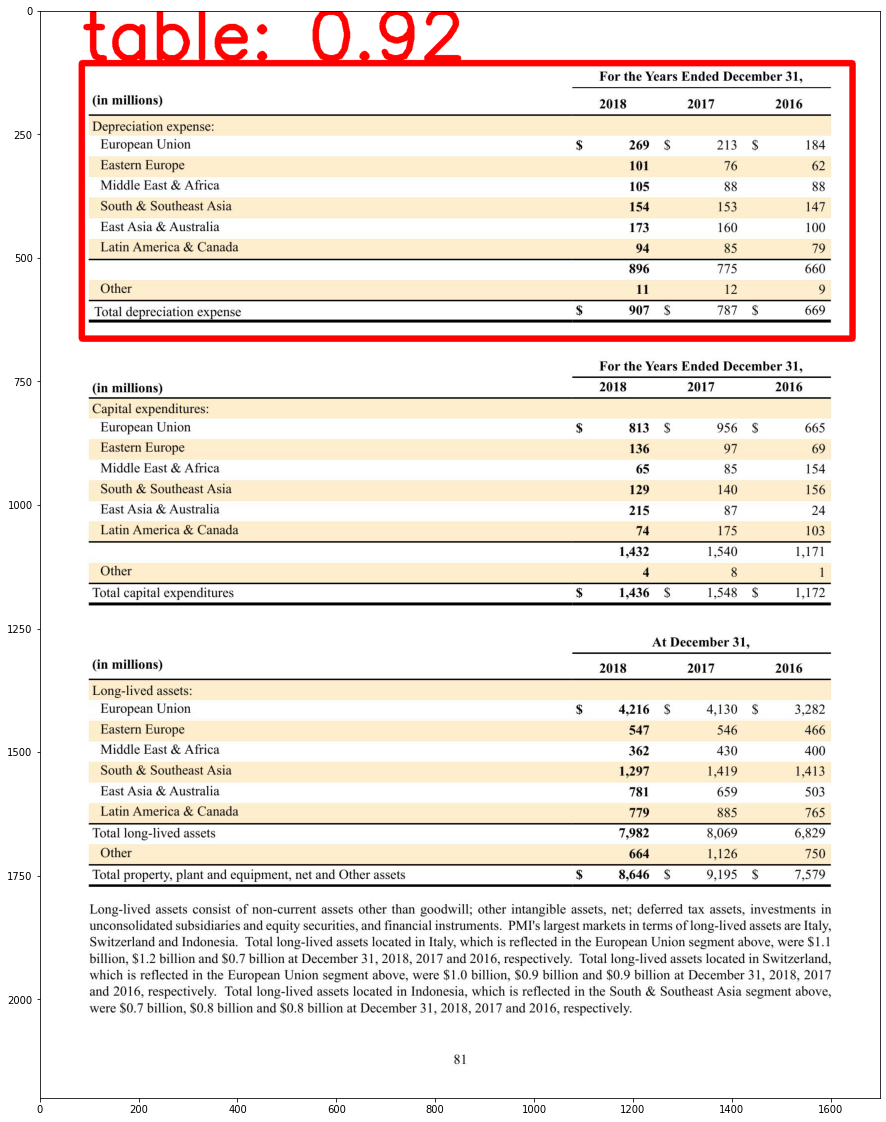

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = imgfname
#image = cv2.imread(image_path)
image = read_image_bgr(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

output = image.copy()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
#print(output.shape) # row (height) x column (width) x color (3)

image = preprocess_image(image)
(image, scale) = resize_image(image)
image = np.expand_dims(image, axis=0)

# detect objects in the input image and correct for the image scale
(boxes, scores, labels) = model.predict_on_batch(image)
boxes /= scale

confidence =  0.8
#import cv2_imshow
#import matplotlib.pyplot as plt
label_out = []
result = ""

# loop over the detections
for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
    # filter out weak detections
    #print((box, score, label))
    if score < confidence:
        continue

    # convert the bounding box coordinates from floats to integers
    box = box.astype("int")
    print(box)
    # build the label and draw the label + bounding box on the output
    # image
    labeli = label
    label = "{}: {:.2f}".format(LABELS[label], score)
    print(label)

    if LABELS[labeli] not in label_out:
        label_out.append(LABELS[labeli])
    cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 12)
    print(box[0])
    print(box[1])
    print(box[2])
    print(box[3])
    cv2.putText(output, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 4.5, (255, 1, 1), 12)

plt.figure(figsize=(20, 20))
plt.imshow(output)
plt.show()

In [13]:
v=[]
for i in range(b):
    print(i)
    file1=i+1
    img_r,imgfname,img = detector.detectObject(file,file1)
    pdf_page=detector.norm_pdf_page(file, file1)
    z = detector.detect_table(imgfname)
    interesting_areas=[]
    for x in z:
        [x1, y1, x2, y2] = detector.bboxes_pdf(img, pdf_page, x)
        bbox_camelot = [",".join([str(x1), str(y1), str(x2), str(y2)])][0]
        print(bbox_camelot)
        interesting_areas.append(bbox_camelot)
    print(interesting_areas)
    output_camelot = camelot.read_pdf(filepath=file, pages=str(file1),table_areas=interesting_areas, flavor='stream',strip_text='\n\t')
    output_camelot=[x.df for x in output_camelot]
    if len(output_camelot)>=1:
        v.append(output_camelot)
    else:
        print('*****Passing*****')

0


NameError: name 'detector' is not defined

In [982]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import cv2
#from skimage import compare_ssim
from skimage.metrics import structural_similarity as ssim
import skimage 


img = cv2.imread('table: 0.92.jpg')
img_2 = cv2.imread('table: 0.93.jpg')

print(ssim(img, img_2))

ValueError: Input images must have the same dimensions.

**Get Table**

In [856]:
pdf_page=norm_pdf_page(PDF_PATH, pg)

PdfReadWarning: Xref table not zero-indexed. ID numbers for objects will be corrected.

In [857]:
z = detect_table(imgfname)
interesting_areas=[]

[ 187 1544 1525 1996]
table: 0.93
[  84  132 1523  646]
table: 0.92


In [858]:
for x in z:
    [x1, y1, x2, y2] = bboxes_pdf(img, pdf_page, x)
    bbox_camelot = [",".join([str(x1), str(y1), str(x2), str(y2)])][0]
    print(bbox_camelot)
    interesting_areas.append(bbox_camelot)


(187, 1544, 1525, 1996)
43.236000000000004,186.228,573.0840000000001,3.168000000000003
(84, 132, 1523, 646)
4.337999999999997,695.106,574.182,486.9359999999999


In [859]:
print(interesting_areas)

['43.236000000000004,186.228,573.0840000000001,3.168000000000003', '4.337999999999997,695.106,574.182,486.9359999999999']


In [940]:
output_camelot = camelot.read_pdf(
    filepath=pdf_file, pages=str(pg), table_areas=interesting_areas,flavor='stream',strip_text='\n\t')

Exception ignored in: <_io.FileIO name='/home/autospider/Desktop/PDF/static/UploadFiles/Ril_Half_Year_Ended_2019.pdf' mode='rb' closefd=True>


In [884]:
output_camelot[1].df.to_excel('Sandeep.xlsx')

In [941]:
v=[]

In [942]:
v.append(output_camelot)

In [946]:
for j in v:
    print(j)

<TableList n=2>


In [956]:
v=[x.df for x in tables]

In [974]:
for i,j in enumerate(v,range(len(v)*100)):
    print(i)

TypeError: 'range' object cannot be interpreted as an integer

In [17]:
from pandas import  ExcelWriter
import xlsxwriter

In [888]:
n=[1,2,3]

In [903]:
import pandas as pd

In [924]:
with pd.ExcelWriter('sandeep'+'.xlsx',engine='xlsxwriter') as writer:
    for j in range(len(output_camelot)):
        output_camelot[j].df.to_excel(writer,sheet_name=str(j))
    #writer.save()
    #writer.close()

In [908]:
with pd.ExcelWriter('sandeep'+'.xlsx',engine='xlsxwriter') as writer:
        for j,db in enumerate(output_camelot):
            db.to_excel(writer,sheet_name=str(j+1))
        #start_row += len(db) + 1 
        writer.save()
        writer.close()

UserWarning: Calling close() on already closed file.

In [939]:
print(v)

[<TableList n=2>]


In [937]:
with ExcelWriter('sandeep'+'.xlsx',engine='xlsxwriter',mode='w') as writer:
    for i in v:
        for j in range(len(i)):
            i[j].df.to_excel(writer,sheet_name=str(j))
        #start_row += len(db) + 1 
        #writer.save()

In [842]:
output_camelot[0].df

IndexError: list index out of range

In [843]:
import time, os, fnmatch, shutil


t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)

In [846]:
'filename Ril_Half_Year_Ended_2019_oct_dsd.pdf'[:-4]

'filename Ril_Half_Year_Ended_2019_oct_dsd'

In [582]:
# interesting_areas=[]

# output = [[x1, y1, x2, y2]]
# for x in output:
#   [x1, y1, x2, y2] = bboxes_pdf(img, pdf_page, x)
#   bbox_camelot = [
#             ",".join([str(x1), str(y1), str(x2), str(y2)])
#         ][0]  # x1,y1,x2,y2 where (x1, y1) -> left-top and (x2, y2) -> right-bottom in PDF coordinate space
#         #print(bbox_camelot)
#   interesting_areas.append(bbox_camelot)


# print(interesting_areas)
# output_camelot = camelot.read_pdf(
#     filepath=pdf_file, pages=str(pg), flavor="stream", table_areas=interesting_areas
# )

# output_camelot[0].df

# #output_camelot=[x.df for x in output_camelot]
# #for i,db in enumerate(output_camelot):
# #  db.to_excel(pdf_file[:-4]+"-"+str(pg)+"-table-"+str(i)+".xlsx")

In [ ]:
['17,899,334,26'],['0,877,882,520']

In [ ]:
['882,899,565,891'],['450,749,757,472'],['1163,64,347,1178'],['104,877,882,121'],['-312,844,849,-294']

In [419]:
1163/2

581.5

In [ ]:
,strip_text='\n\t'

In [760]:
import warnings
warnings.filterwarnings('error')

In [2]:
import camelot

In [3]:
tables=camelot.read_pdf("/home/autospider/Downloads/96460059-638a-4067-b1a7-e173fdf49a38.pdf",pages='30',flavor='stream',strip_text='\n\t')

In [4]:
tables[0].to_excel('/home/autospider/Desktop/san.xlsx')

In [31]:
m=tables[0].df.iloc[0,0].replace(u'\xa0', u' ')

In [32]:
m

'Other Financial and Statistical Data (Unaudited)'

In [29]:
dg1.iloc[0,0]

'Other\xa0Financial\xa0and\xa0Statistical\xa0Data\xa0(Unaudited)'

In [742]:
camelot.plot(tables[0], kind='joint').show()

NotImplementedError: Stream flavor does not support kind='joint'

In [42]:
import pdfkit
pdfkit.from_url('https://www.sec.gov/Archives/edgar/data/104169/000010416920000042/wmtform10-qx7312020.htm', 'out_w.pdf')

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True

In [529]:
from PyPDF2 import PdfFileReader

In [533]:
with open('/home/autospider/Desktop/PDF/static/UploadFiles/Ril_Half_Year_Ended_2019.pdf', "rb") as pdf_file:
    pdf_reader = PdfFileReader(pdf_file)
    X=pdf_reader.numPages

In [538]:
for i in range(X):
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [129]:
import subprocess

subprocess.check_call(["convert","/home/autospider/Desktop/PDF_Compare/document2.pdf","/home/autospider/Desktop/PDF_Compare/document2.jpg"])

0

In [130]:
from diff_pdf_visually import pdfdiff

In [133]:
pdfdiff("/home/autospider/Desktop/PDF_Compare/document2.pdf","/home/autospider/Desktop/PDF_Compare/document.pdf")

  Temporary directory: /tmp/diffpdfz5rwyfcm
  Converting each page of the PDFs to an image...
Different number of pages: 129 vs 138


False

In [134]:
pdfdiff("/home/autospider/Desktop/PDF_Compare/document-pages-1-10.pdf","/home/autospider/Desktop/PDF_Compare/document2-pages-1-10.pdf")

  Temporary directory: /tmp/diffpdf3936t5rq
  Converting each page of the PDFs to an image...
  PDFs have same number of pages. Checking each pair of converted images...
Min sig = 13.4518, significant?=True. The PDFs are different. The most different pages are: page 9 (sgf. 13.4518), page 5 (sgf. 13.7438), page 7 (sgf. 13.7984), page 10 (sgf. 13.8103), page 4 (sgf. 13.8977).


False

In [135]:
import img2pdf

In [139]:
img2pdf "/home/autospider/Desktop/PDF_Compare/comparision.png" -o "out.pdf"

SyntaxError: invalid syntax (<ipython-input-139-97d554772260>, line 1)